In [1]:
import pandas as pd
import numpy as np

## Data Preprocessing

In [2]:
train_data = pd.read_excel("Consumption Dataset.xlsx") # read the excel sheet
train_data.head()

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.0,4379.88
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.0,1344.37
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.0,1034.28
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2194.53,0.00,0.0,2194.53
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.0,1020.90


In [ ]:
train_data['DayOfWeek'] = train_data['Date Time Served'].dt.dayofweek  # 0=Monday,1=Tuesday,2=Wednesday......
train_data['Month'] = train_data['Date Time Served'].dt.month  # Month 1,2,3,4,5 to 12
train_data['Hour'] = train_data['Date Time Served'].dt.hour # Hours 0 to 24

In [4]:
train_data

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),DayOfWeek,Month,Hour
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2.555040e+03,1824.84,0.00,4379.88,6,1,19
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1.344370e+03,0.00,0.00,1344.37,6,1,10
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1.034280e+03,0.00,0.00,1034.28,6,1,11
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2.194530e+03,0.00,0.00,2194.53,6,1,13
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1.020900e+03,0.00,0.00,1020.90,6,1,22
...,...,...,...,...,...,...,...,...,...,...,...
6570,2024-01-01 21:03:00,Anderson's Bar,Beer,Coors,2.467080e+03,0.00,321.06,2146.02,0,1,21
6571,2024-01-01 21:15:00,Anderson's Bar,Rum,Malibu,8.526513e-14,1743.64,175.05,1568.59,0,1,21
6572,2024-01-01 18:34:00,Anderson's Bar,Whiskey,Jack Daniels,4.192660e+03,0.00,197.60,3995.06,0,1,18
6573,2024-01-01 22:46:00,Thomas's Bar,Vodka,Absolut,2.424950e+03,0.00,128.52,2296.43,0,1,22


In [5]:
train_data.columns

Index(['Date Time Served', 'Bar Name', 'Alcohol Type', 'Brand Name',
       'Opening Balance (ml)', 'Purchase (ml)', 'Consumed (ml)',
       'Closing Balance (ml)', 'DayOfWeek', 'Month', 'Hour'],
      dtype='object')

In [6]:
train_data.drop(["Date Time Served"], axis=1, inplace=True) # Drop Date Time Served column because now it is not necessary 

In [7]:
train_data['Opening Balance (ml)'] = train_data['Opening Balance (ml)'].astype(float)
train_data['Opening Balance (ml)'] = train_data['Opening Balance (ml)'].map('{:.2f}'.format)

In [8]:
train_data['Purchase (ml)'] = train_data['Purchase (ml)'].astype(float)
train_data['Purchase (ml)'] = train_data['Purchase (ml)'].map('{:.2f}'.format)

In [9]:
train_data['Consumed (ml)'] = train_data['Consumed (ml)'].astype(float)
train_data['Consumed (ml)'] = train_data['Consumed (ml)'].map('{:.2f}'.format)

In [10]:
train_data['Closing Balance (ml)'] = train_data['Closing Balance (ml)'].astype(float)
train_data['Closing Balance (ml)'] = train_data['Closing Balance (ml)'].map('{:.2f}'.format)

In [11]:
train_data.to_csv("test.csv")  ## to check transformation

##### Write the logic for calculating the 'Closing Balance (ml)' based on the transformed values of 'Opening Balance (ml)', 'Purchase (ml)', and 'Consumed (ml)'.

In [12]:
cols = ["Opening Balance (ml)", "Purchase (ml)", "Consumed (ml)", "Closing Balance (ml)"]
train_data[cols] = train_data[cols].apply(pd.to_numeric)

train_data["Closing Balance (ml)"] = train_data["Opening Balance (ml)"] + train_data["Purchase (ml)"] - train_data["Consumed (ml)"]

In [13]:
train_data.info()   # Shows column names, data types, non-null counts, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bar Name              6575 non-null   object 
 1   Alcohol Type          6575 non-null   object 
 2   Brand Name            6575 non-null   object 
 3   Opening Balance (ml)  6575 non-null   float64
 4   Purchase (ml)         6575 non-null   float64
 5   Consumed (ml)         6575 non-null   float64
 6   Closing Balance (ml)  6575 non-null   float64
 7   DayOfWeek             6575 non-null   int32  
 8   Month                 6575 non-null   int32  
 9   Hour                  6575 non-null   int32  
dtypes: float64(4), int32(3), object(3)
memory usage: 436.7+ KB


In [14]:
train_data["Bar Name"].value_counts()  # Catergorical Columns

Bar Name
Johnson's Bar     1106
Anderson's Bar    1102
Thomas's Bar      1101
Brown's Bar       1100
Taylor's Bar      1088
Smith's Bar       1078
Name: count, dtype: int64

In [15]:
train_data["Alcohol Type"].value_counts()   # Catergorical Columns

Alcohol Type
Vodka      1331
Wine       1316
Whiskey    1316
Rum        1310
Beer       1302
Name: count, dtype: int64

In [16]:
train_data["Brand Name"].value_counts()    # Catergorical Columns

Brand Name
Yellow Tail       479
Captain Morgan    471
Grey Goose        465
Jim Beam          455
Smirnoff          434
Jack Daniels      433
Absolut           432
Jameson           428
Malibu            425
Barefoot          424
Bacardi           414
Sutter Home       413
Miller            363
Coors             325
Heineken          314
Budweiser         300
Name: count, dtype: int64

In [17]:
train_data = train_data.sort_values(["Bar Name", "Brand Name", "DayOfWeek", "Hour"])  # Assuming approximate order

# Lag features: based on each row is a "time step" (weekly/hourly)
train_data["lag_1"] = train_data.groupby(["Bar Name", "Brand Name"])["Consumed (ml)"].shift(1)  # consumed (ml) one time step ago
train_data["lag_2"] = train_data.groupby(["Bar Name", "Brand Name"])["Consumed (ml)"].shift(2)  # consumed (ml) two time step ago

# Rolling average (based on lag)
train_data["roll_3"] = train_data.groupby(["Bar Name", "Brand Name"])["Consumed (ml)"].shift(1).rolling(3).mean() # average consumption over the last 3 time steps

In [ ]:
train_data.fillna(0, inplace=True)  # fill 0 where values are NaN

In [19]:
train_data.to_csv("train_data.csv")

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

## Pie Chart

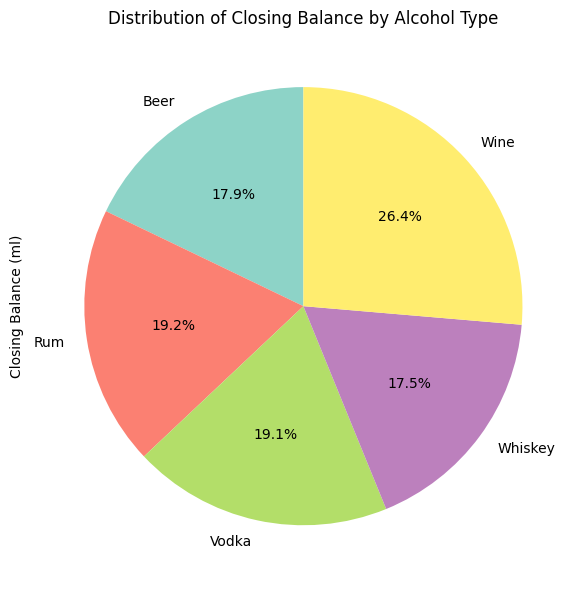

In [21]:
train_data.groupby("Alcohol Type")["Closing Balance (ml)"].sum().plot(
    kind="pie", autopct='%1.1f%%', figsize=(6, 6), startangle=90, cmap="Set3"
)
plt.title("Distribution of Closing Balance by Alcohol Type")
plt.tight_layout()
plt.show()

## Bar Chart

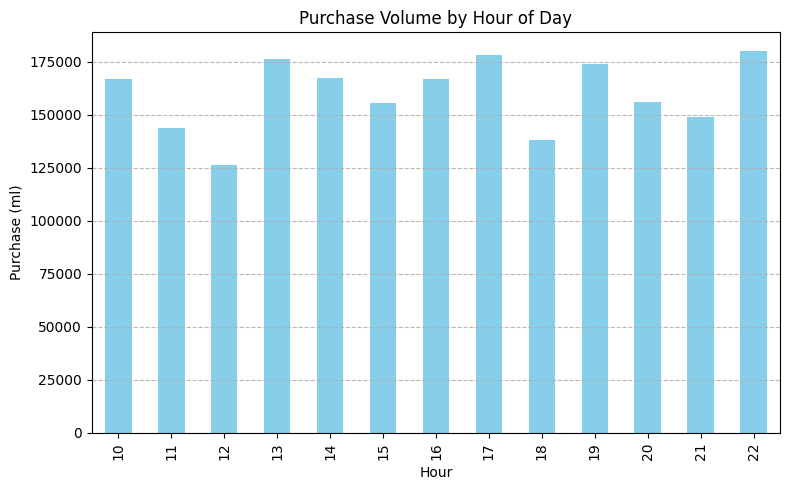

In [22]:
hour_summary = train_data.groupby("Hour")["Purchase (ml)"].sum()

hour_summary.plot(kind="bar", color="skyblue", figsize=(8, 5))
plt.title("Purchase Volume by Hour of Day")
plt.ylabel("Purchase (ml)")
plt.xlabel("Hour")
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

## Bar Chart

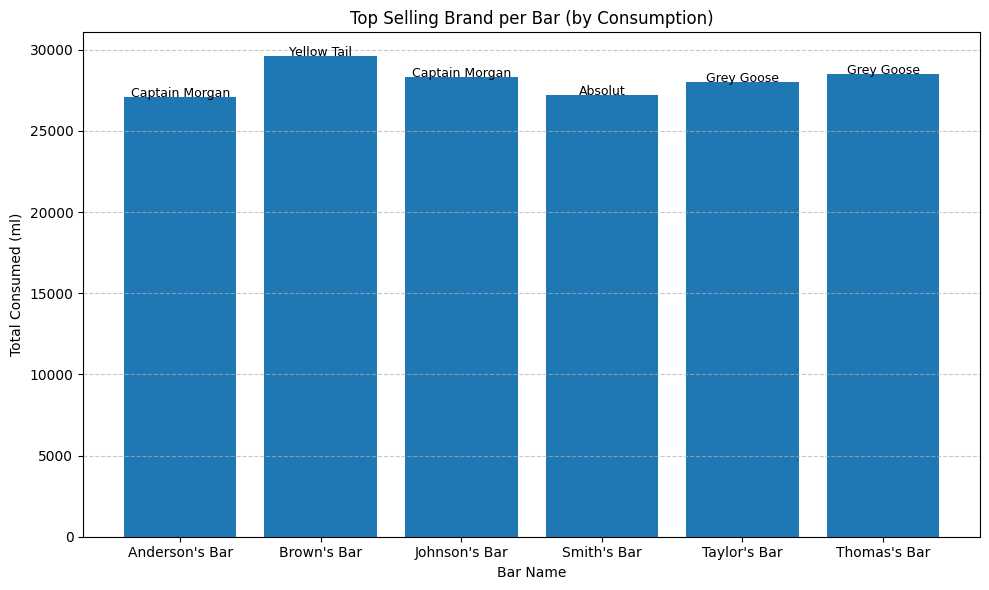

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

brand_consumption = train_data.groupby(["Bar Name", "Brand Name"])["Consumed (ml)"].sum().reset_index()

top_selling = brand_consumption.loc[brand_consumption.groupby("Bar Name")["Consumed (ml)"].idxmax()]

plt.figure(figsize=(10, 6))
plt.bar(top_selling["Bar Name"], top_selling["Consumed (ml)"])
plt.title("Top Selling Brand per Bar (by Consumption)")
plt.xlabel("Bar Name")
plt.ylabel("Total Consumed (ml)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add brand names as labels
for i, row in top_selling.iterrows():
    plt.text(row["Bar Name"], row["Consumed (ml)"], row["Brand Name"], ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Line Chart

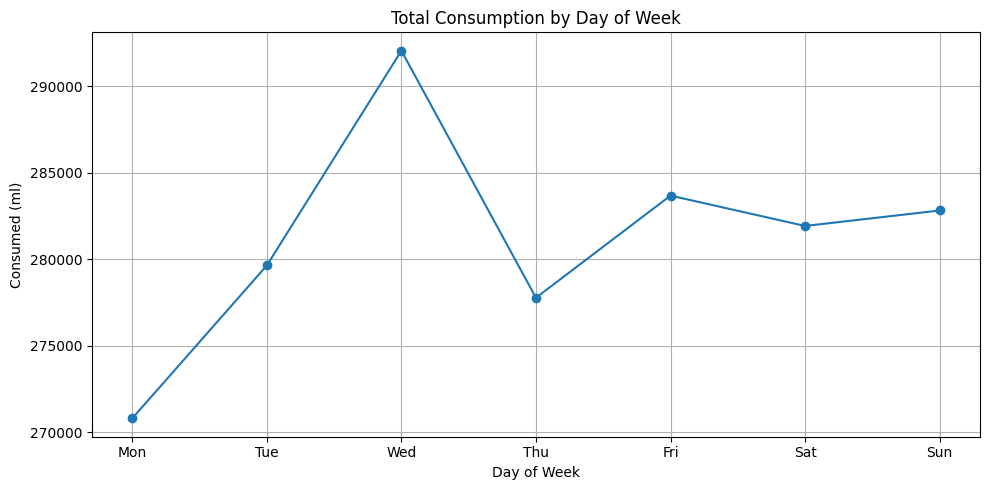

In [24]:
import matplotlib.pyplot as plt

# Group by DayOfWeek and sum consumption
daywise_consumption = train_data.groupby("DayOfWeek")["Consumed (ml)"].sum().reset_index()

# Map numeric day to actual names
day_map = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
daywise_consumption["Day Name"] = daywise_consumption["DayOfWeek"].map(day_map)

# Sort by DayOfWeek
daywise_consumption = daywise_consumption.sort_values("DayOfWeek")

plt.figure(figsize=(10, 5))
plt.plot(daywise_consumption["Day Name"], daywise_consumption["Consumed (ml)"], marker='o')
plt.title("Total Consumption by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Consumed (ml)")
plt.grid(True)
plt.tight_layout()
plt.show()


## One-Hot-Encoding

In [25]:
Bar_Name = pd.get_dummies(train_data["Bar Name"], prefix="Bar",drop_first=True).astype(int)
Brand_Name = pd.get_dummies(train_data["Brand Name"], prefix="Brand",drop_first=True).astype(int)
Alcohol_Name = pd.get_dummies(train_data["Alcohol Type"], prefix="Alcohol",drop_first=True).astype(int)

In [26]:
data_train = pd.concat([train_data, Bar_Name, Brand_Name, Alcohol_Name], axis=1)

In [27]:
data_train

,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),DayOfWeek,Month,Hour,...,Brand_Jim Beam,Brand_Malibu,Brand_Miller,Brand_Smirnoff,Brand_Sutter Home,Brand_Yellow Tail,Alcohol_Rum,Alcohol_Vodka,Alcohol_Whiskey,Alcohol_Wine
6453,Anderson's Bar,Vodka,Absolut,0.00,0.0,0.00,0.00,0,12,10,...,0,0,0,0,0,0,0,1,0,0
4588,Anderson's Bar,Vodka,Absolut,0.00,0.0,0.00,0.00,0,9,19,...,0,0,0,0,0,0,0,1,0,0
3220,Anderson's Bar,Vodka,Absolut,1283.39,0.0,301.76,981.63,0,6,20,...,0,0,0,0,0,0,0,1,0,0
6329,Anderson's Bar,Vodka,Absolut,186.47,0.0,186.47,0.00,0,12,20,...,0,0,0,0,0,0,0,1,0,0
32,Anderson's Bar,Vodka,Absolut,1309.92,0.0,118.62,1191.30,0,1,21,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,Thomas's Bar,Wine,Yellow Tail,2262.96,0.0,310.16,1952.80,6,6,19,...,0,0,0,0,0,1,0,0,0,1
5192,Thomas's Bar,Wine,Yellow Tail,1157.92,0.0,395.33,762.59,6,10,19,...,0,0,0,0,0,1,0,0,0,1
1573,Thomas's Bar,Wine,Yellow Tail,0.00,0.0,0.00,0.00,6,3,20,...,0,0,0,0,0,1,0,0,0,1
3455,Thomas's Bar,Wine,Yellow Tail,731.02,0.0,129.83,601.19,6,7,20,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Drop the object columns after one hot encoding because now it is not important

data_train.drop(columns=['Bar Name', 'Alcohol Type', 'Brand Name'], axis=1, inplace=True)

## Remove Outliers using IQR method

In [29]:
def cap_outliers_iqr(df, columns, threshold=1.5):
    df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df[col] = np.where(df[col] < lower_bound, lower_bound,
                           np.where(df[col] > upper_bound, upper_bound, df[col]))
    return df

In [30]:
cols_with_outliers = ['lag_1', 'lag_2', 'roll_3','Opening Balance (ml)', 'Consumed (ml)','Closing Balance (ml)','Purchase (ml)']
train_data = cap_outliers_iqr(train_data, cols_with_outliers)

## Plot to see is there any outliers?

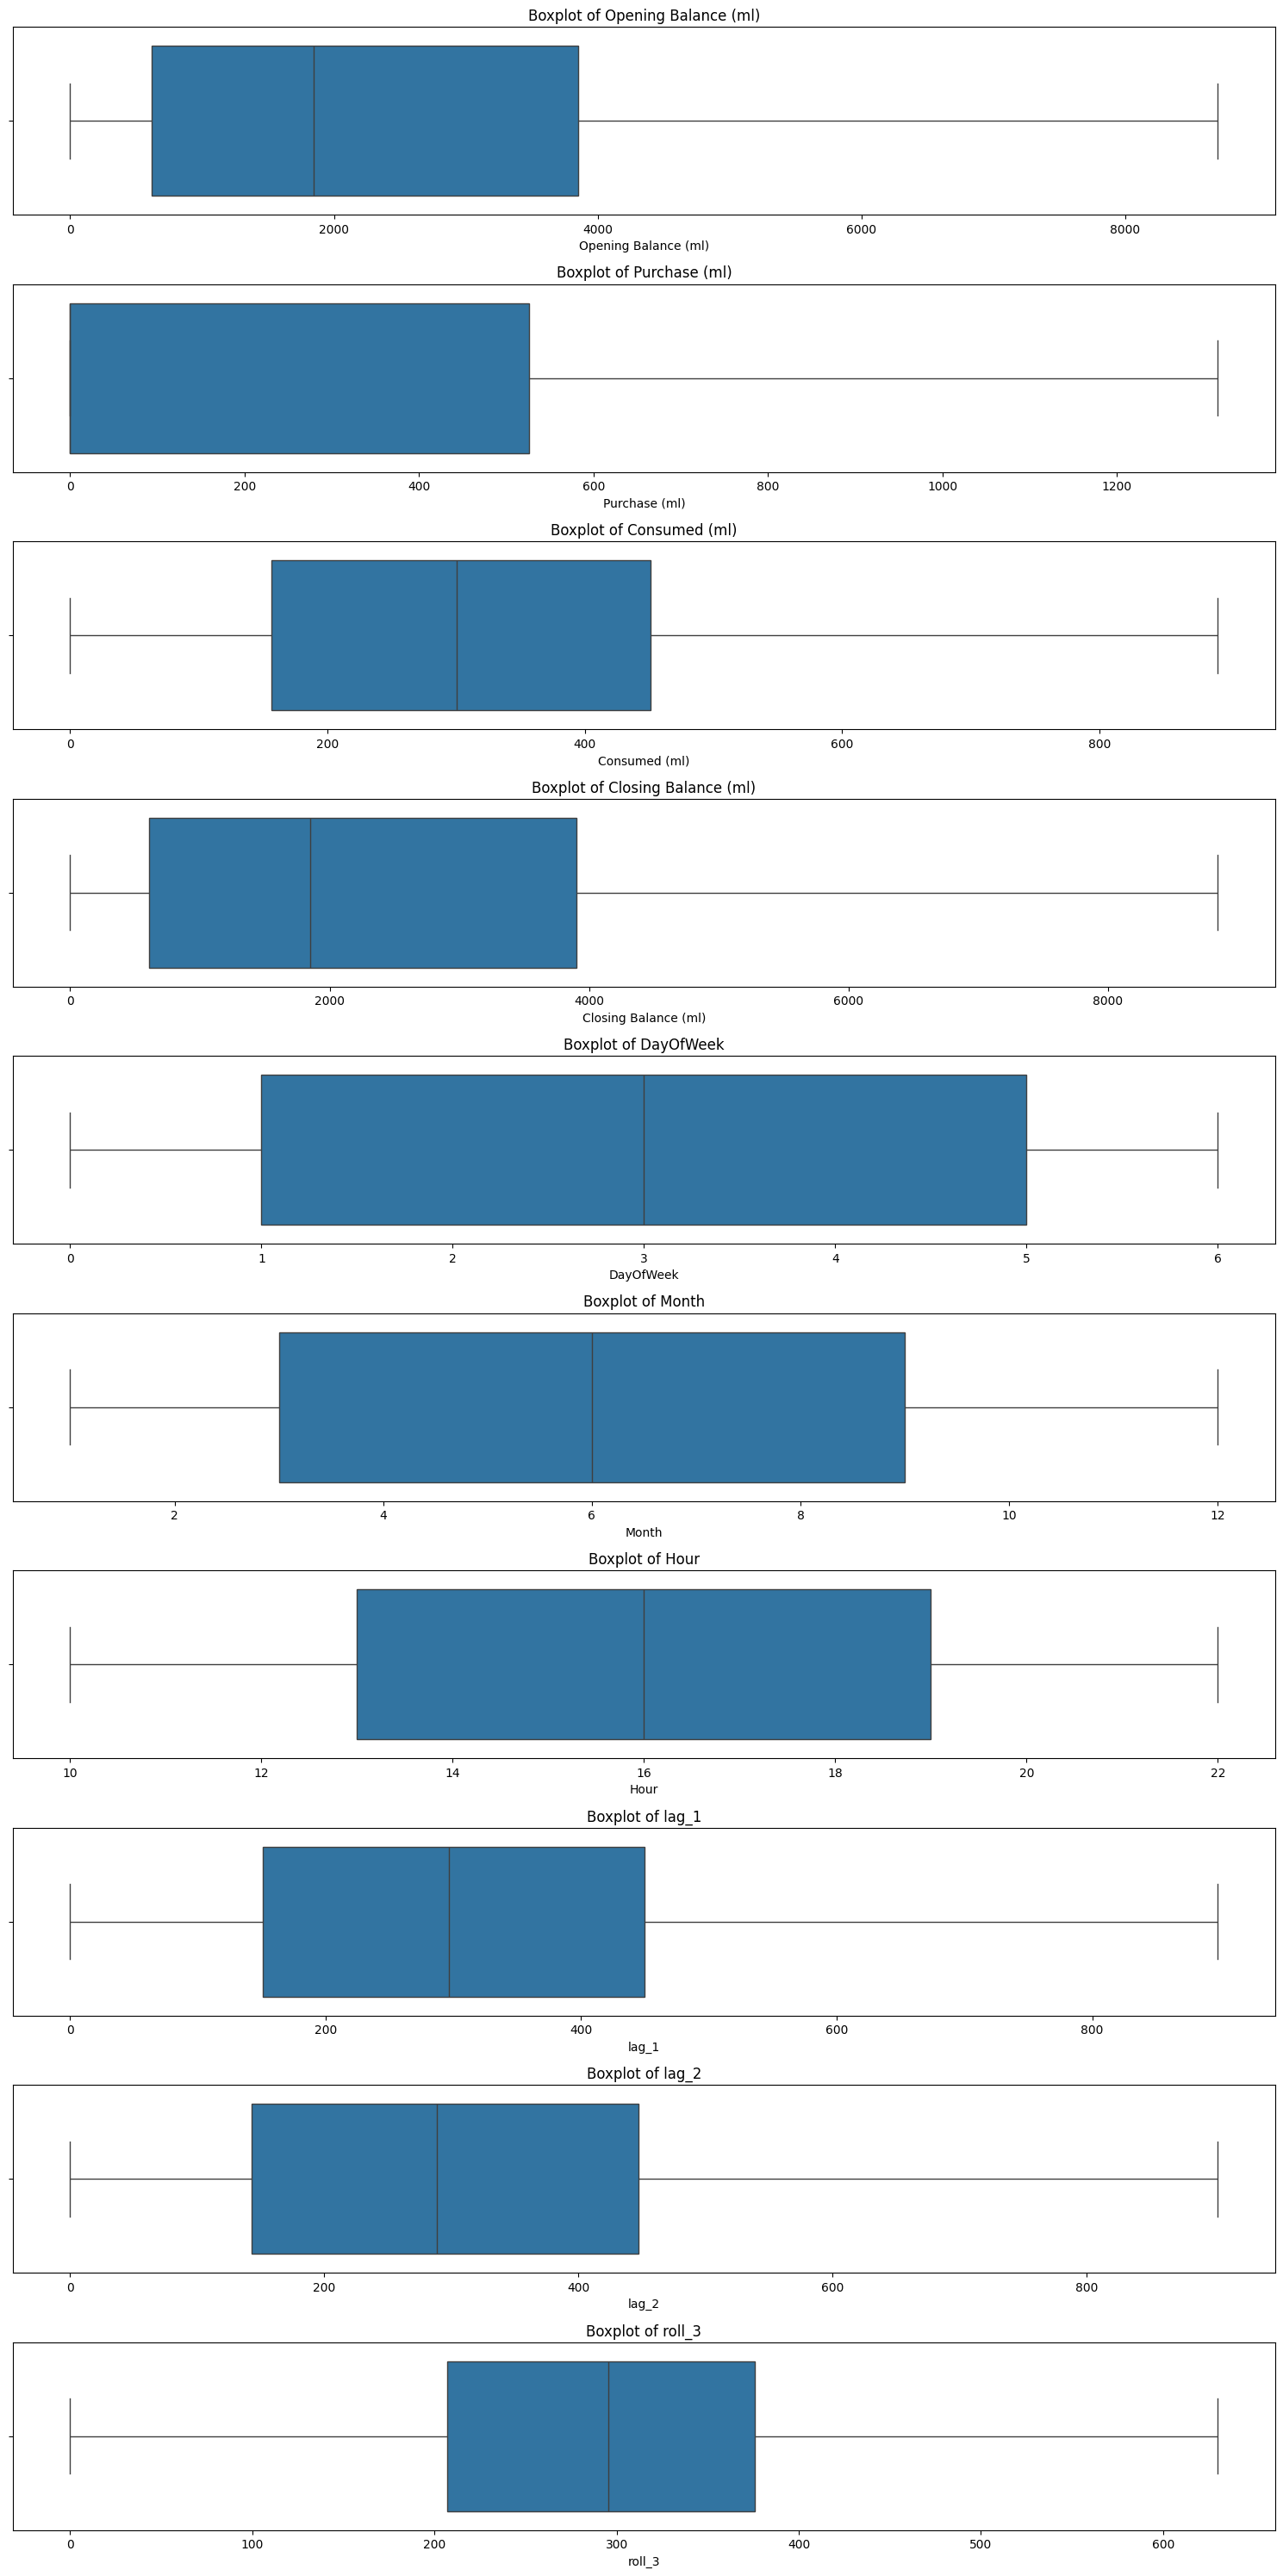

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = train_data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, len(numeric_cols)*3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=train_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [32]:
data_train.columns

Index(['Opening Balance (ml)', 'Purchase (ml)', 'Consumed (ml)',
       'Closing Balance (ml)', 'DayOfWeek', 'Month', 'Hour', 'lag_1', 'lag_2',
       'roll_3', 'Bar_Brown's Bar', 'Bar_Johnson's Bar', 'Bar_Smith's Bar',
       'Bar_Taylor's Bar', 'Bar_Thomas's Bar', 'Brand_Bacardi',
       'Brand_Barefoot', 'Brand_Budweiser', 'Brand_Captain Morgan',
       'Brand_Coors', 'Brand_Grey Goose', 'Brand_Heineken',
       'Brand_Jack Daniels', 'Brand_Jameson', 'Brand_Jim Beam', 'Brand_Malibu',
       'Brand_Miller', 'Brand_Smirnoff', 'Brand_Sutter Home',
       'Brand_Yellow Tail', 'Alcohol_Rum', 'Alcohol_Vodka', 'Alcohol_Whiskey',
       'Alcohol_Wine'],
      dtype='object')

### X = Independent Feature
### y = Dependent Feature

In [ ]:
X = data_train.drop(columns = ["Consumed (ml)"], axis=1)  ## Independent Feature
y = data_train["Consumed (ml)"]  ## Dependent Feature

## Finds top features using ExtraTreesRegressor

In [34]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


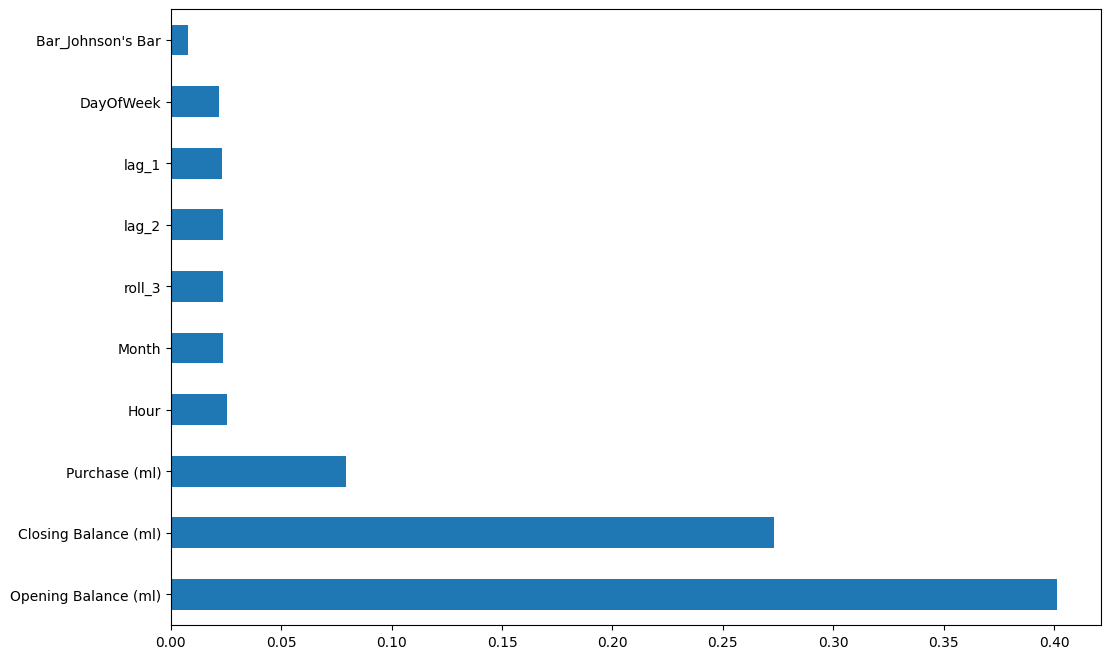

In [35]:
plt.figure(figsize=(12,8))
feat_importance = pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [36]:
importance = pd.Series(selection.feature_importances_, index = X.columns)

top_features = importance.sort_values(ascending=False).head(10)

In [37]:
X_selected = X[top_features.index]

## Split dataset into train and test

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

## RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
model_rfr.score(X_train,y_train)

0.9690950969128034

In [41]:
model_rfr.score(X_test,y_test)

0.78364238349008

##### RandomForestRegressor overfits the model so we can use XGBoost for it.

## XGBoost with Hyperparameter tuning.

In [42]:
from xgboost import XGBRegressor

xgb = XGBRegressor()


In [43]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.03, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

search = RandomizedSearchCV(XGBRegressor(), params, scoring='r2', cv=3, n_iter=20)
search.fit(X, y)

print("Best params:", search.best_params_)

Best params: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [44]:
search.score(X_train,y_train)

0.9894014125291001

In [45]:
search.score(X_test, y_test)

0.9905218977912993

#### How much the feature is important for model.

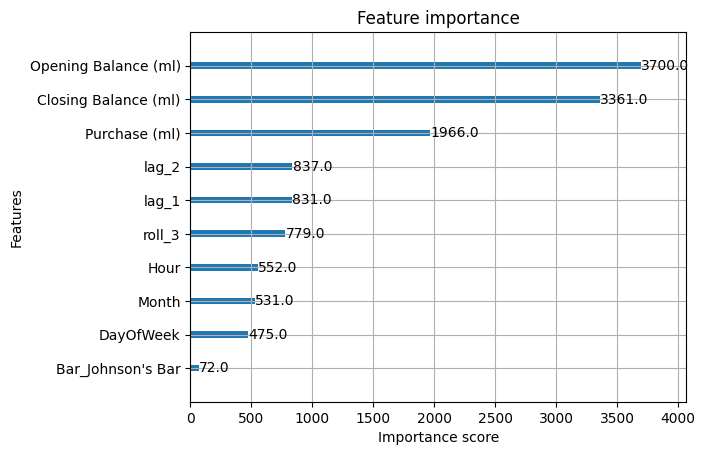

In [46]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(search.best_estimator_, max_num_features=10)
plt.show()

## save the model into pickle file

In [47]:
import joblib
import pickle

joblib.dump(search, "xgb_inventory_model.pkl")

['xgb_inventory_model.pkl']

### Predict and Recommenadation value.

In [52]:
import pandas as pd
import numpy as np
import joblib

# Define the features for prediction
X_future = data_train.drop(columns=["Consumed (ml)"])  # make sure "Consumed (ml)" exists in your data_train

# Load the trained model
model = joblib.load("xgb_inventory_model.pkl")

# Predict consumption
predicted_consumption = model.predict(X_future)

# Recommend inventory level (15% buffer)
buffer = 0.15
recommended_inventory = np.ceil(predicted_consumption * (1 + buffer))

# Extract actual Bar Name from one-hot encoded columns
bar_columns = [col for col in data_train.columns if col.startswith("Bar_")]
bar_names = data_train[bar_columns].idxmax(axis=1).str.replace("Bar_", "", regex=False)

# Create result DataFrame
results_df = pd.DataFrame({
    "Bar Name": bar_names,
    "Predicted Consumption (ml)": np.round(predicted_consumption, 2),
    "Recommended Par Level (ml)": recommended_inventory.astype(int)
})

# Show results
print(results_df)

          Bar Name  Predicted Consumption (ml)  Recommended Par Level (ml)
6453   Brown's Bar                   -7.890000                          -9
4588   Brown's Bar                   -0.730000                           0
3220   Brown's Bar                  294.779999                         339
6329   Brown's Bar                  194.259995                         224
32     Brown's Bar                  137.220001                         158
...            ...                         ...                         ...
2957  Thomas's Bar                  292.200012                         337
5192  Thomas's Bar                  381.269989                         439
1573  Thomas's Bar                    5.970000                           7
3455  Thomas's Bar                  139.710007                         161
4823  Thomas's Bar                  595.969971                         686

[6575 rows x 3 columns]


#### Features are saved into pickle file because i have to use it into stremlit application

In [51]:
X.to_pickle("X_feature_template.pkl")